Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import pathlib
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Rescaling,Resizing
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.regularizers import l2

In [2]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/drive/My Drive/Deep Learning Google colab upgrad/Melanoma Detection/Train")
data_dir_test = pathlib.Path('/content/drive/My Drive/Deep Learning Google colab upgrad/Melanoma Detection/Test')

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_train,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
test_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

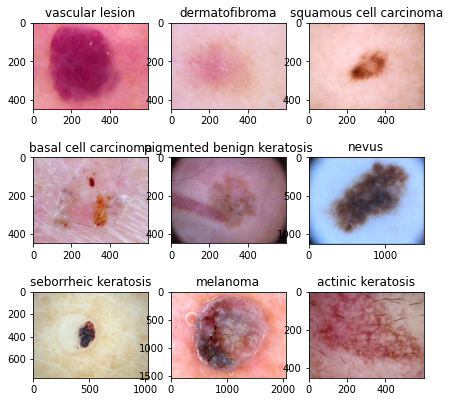

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
class_names=['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
### your code goes here, you can use training or validation data to visualize
import os
imb_dict={}
classnames=os.listdir(data_dir_train)
i=0
plt.figure(figsize=(7,7))
for fldr in os.listdir(data_dir_train):
  i=i+1
  img=os.listdir(pathlib.Path(data_dir_train,fldr))
  plt.subplot(3,3,i)
  plt.imshow(mpimg.imread(pathlib.Path(data_dir_train,fldr,img[0])))
  plt.title(fldr)
plt.show()


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
initializer = tf.keras.initializers.HeNormal()

model = Sequential()
model.add(Resizing(180,180))
#model.add(Rescaling(1./255))
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=(180,180,3),kernel_initializer=initializer))
#model.add(Activation('LeakyRelu'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3),kernel_initializer=initializer))
#model.add(Activation('LeakyRelu'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
#model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same',kernel_initializer=initializer))
#model.add(Activation('LeakyRelu'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3),kernel_initializer=initializer))
#model.add(Activation('LeakyRelu'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01),kernel_initializer=initializer))
#model.add(Activation('LeakyRelu'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model.add(Dropout(0.2))
model.add(Dense(9,kernel_initializer=initializer))
model.add(Activation('softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])


In [ ]:
# View the summary of all layers
#model.summary()

### Train the model

In [ ]:
epochs = 18
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=18
)

Epoch 1/18


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


56/56 [==============================] - 282s 1s/step - loss: 124.9035 - accuracy: 0.3460 - val_loss: 1757.7069 - val_accuracy: 0.1902
Epoch 2/18
56/56 [==============================] - 29s 510ms/step - loss: 78.7680 - accuracy: 0.4408 - val_loss: 209.8119 - val_accuracy: 0.2260
Epoch 3/18
56/56 [==============================] - 29s 510ms/step - loss: 63.3677 - accuracy: 0.4665 - val_loss: 74.4702 - val_accuracy: 0.3669
Epoch 4/18
56/56 [==============================] - 29s 509ms/step - loss: 43.1318 - accuracy: 0.5324 - val_loss: 53.1342 - val_accuracy: 0.4251
Epoch 5/18
56/56 [==============================] - 28s 509ms/step - loss: 29.5114 - accuracy: 0.5603 - val_loss: 31.3550 - val_accuracy: 0.4206
Epoch 6/18
56/56 [==============================] - 28s 507ms/step - loss: 21.2054 - accuracy: 0.5854 - val_loss: 23.2980 - val_accuracy: 0.3937
Epoch 7/18
56/56 [==============================] - 28s 508ms/step - loss: 15.3696 - accuracy: 0.6283 - val_loss: 16.5268 - val_accuracy: 0

In [ ]:
model.evaluate(test_ds)

4/4 [==============================] - 22s 434ms/step - loss: 5.5632 - accuracy: 0.3559


[5.563206672668457, 0.35593220591545105]

### Visualizing training results

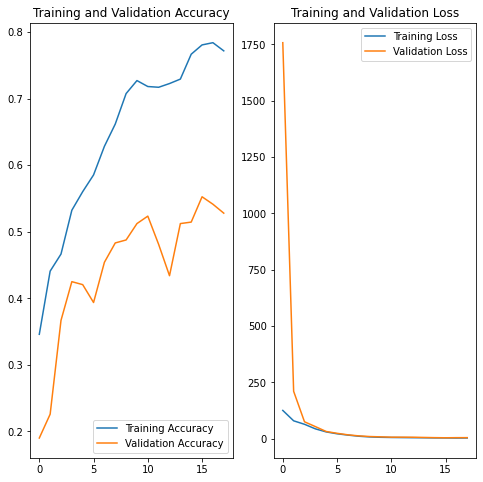

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

1) Model Overfitted it has more acuracy on training data and less accuracy on Tesdata


In [25]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 
# Your code goes here
from keras.preprocessing.image import ImageDataGenerator
#batch_size = 8
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0,
        horizontal_flip=True,
        zoom_range=0.3,
        brightness_range=[0.2,1.2],
        vertical_flip=True,
        rotation_range=20,
        validation_split=0.1
        )  # randomly shift images vertically (fraction of total height))
test_datagen = ImageDataGenerator(rescale=1./255
                                  #,validation_split=0.1
                                  )  
train_generator = train_datagen.flow_from_directory(
    directory=data_dir_train,
    target_size=(180, 180),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="sparse",
    subset='training',
    shuffle=True,
    seed=123
)

valid_generator = train_datagen.flow_from_directory(
    directory=data_dir_train,
    target_size=(180, 180),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="sparse",
    subset='validation',
    shuffle=True,
    seed=123
)


test_generator = test_datagen.flow_from_directory(
    directory=data_dir_test,
    target_size=(180, 180),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="sparse",
    #subset='validation',
    shuffle=True,
    seed=123
)

Found 6070 images belonging to 9 classes.
Found 669 images belonging to 9 classes.
Found 118 images belonging to 9 classes.


/content/drive/My Drive/Deep Learning Google colab upgrad/Melanoma Detection/Train/actinic keratosis/ISIC_0025957.jpg
/content/drive/My Drive/Deep Learning Google colab upgrad/Melanoma Detection/Train/melanoma/ISIC_0000141.jpg
/content/drive/My Drive/Deep Learning Google colab upgrad/Melanoma Detection/Train/vascular lesion/ISIC_0024669.jpg
/content/drive/My Drive/Deep Learning Google colab upgrad/Melanoma Detection/Train/seborrheic keratosis/ISIC_0010810.jpg
/content/drive/My Drive/Deep Learning Google colab upgrad/Melanoma Detection/Train/squamous cell carcinoma/ISIC_0024843.jpg
/content/drive/My Drive/Deep Learning Google colab upgrad/Melanoma Detection/Train/dermatofibroma/ISIC_0025622.jpg
/content/drive/My Drive/Deep Learning Google colab upgrad/Melanoma Detection/Train/pigmented benign keratosis/ISIC_0024445.jpg
/content/drive/My Drive/Deep Learning Google colab upgrad/Melanoma Detection/Train/basal cell carcinoma/ISIC_0024504.jpg
/content/drive/My Drive/Deep Learning Google cola

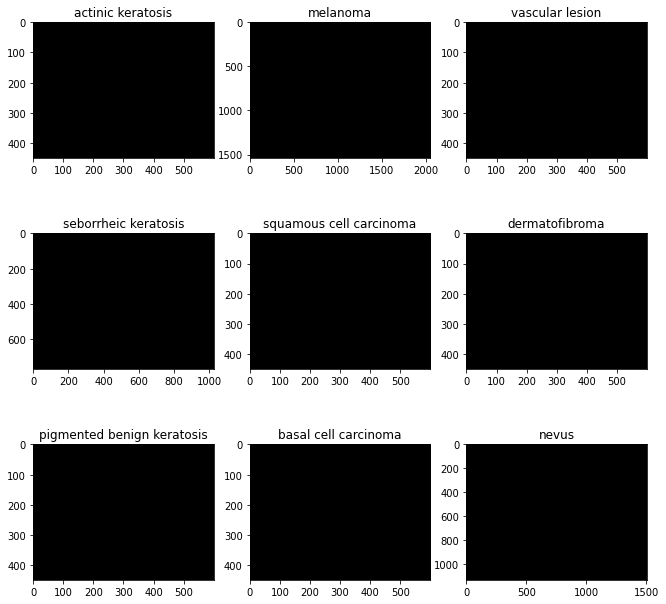

In [26]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
plt.figure(figsize=(11,11))
i=0
for fldr in os.listdir(data_dir_train):
    i=i+1
    img=os.listdir(pathlib.Path(data_dir_train,fldr))
    print(pathlib.Path(data_dir_train,fldr,img[0]))
    img = load_img(pathlib.Path(data_dir_train,fldr,img[0]))
    # convert to numpy array
  
    data = img_to_array(img)
    # expand dimension to one sample
    samples = expand_dims(data, 0)
    it = train_datagen.flow(samples, batch_size=1)
    batch = it.next()
    batch = it.next()
    image = batch[0].astype('uint8')
    plt.subplot(3,3,i)
    plt.imshow(image)
    plt.title(fldr)
plt.show()

#### Unable to visualize data ####

### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
initializer = tf.keras.initializers.HeNormal()

model = Sequential()
#model.add(Resizing(180,180))
model.add(Rescaling(1./255))
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=(180,180,3),kernel_initializer=initializer))
#model.add(Activation('LeakyRelu'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3),kernel_initializer=initializer))
#model.add(Activation('LeakyRelu'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same',kernel_initializer=initializer))
#model.add(Activation('LeakyRelu'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3),kernel_initializer=initializer))
#model.add(Activation('LeakyRelu'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01),kernel_initializer=initializer))
#model.add(Activation('LeakyRelu'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model.add(Dropout(0.2))
model.add(Dense(9,kernel_initializer=initializer))
model.add(Activation('softmax'))


### Compiling the model

In [ ]:
## Your code goes here
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),#'categorical_crossentropy',
  metrics=['accuracy'])

STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
#history = ## your training code
epochs=25
history=model.fit_generator(
  train_generator,
        steps_per_epoch=STEP_SIZE_TRAIN,
        epochs=25,
        validation_data=valid_generator,
        validation_steps=STEP_SIZE_VALID
        #,class_weight=train_class_weights
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  if __name__ == '__main__':


Epoch 1/25


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


63/63 [==============================] - 520s 8s/step - loss: 172.7760 - accuracy: 0.2837 - val_loss: 90.4596 - val_accuracy: 0.2917
Epoch 2/25
63/63 [==============================] - 70s 1s/step - loss: 98.4427 - accuracy: 0.3189 - val_loss: 152.9189 - val_accuracy: 0.0729
Epoch 3/25
63/63 [==============================] - 70s 1s/step - loss: 83.2202 - accuracy: 0.3486 - val_loss: 232.4966 - val_accuracy: 0.0521
Epoch 4/25
63/63 [==============================] - 72s 1s/step - loss: 62.6201 - accuracy: 0.3632 - val_loss: 115.8256 - val_accuracy: 0.0833
Epoch 5/25
63/63 [==============================] - 71s 1s/step - loss: 44.9697 - accuracy: 0.3426 - val_loss: 86.5535 - val_accuracy: 0.0990
Epoch 6/25
63/63 [==============================] - 72s 1s/step - loss: 27.1097 - accuracy: 0.3742 - val_loss: 39.8885 - val_accuracy: 0.2812
Epoch 7/25
63/63 [==============================] - 72s 1s/step - loss: 16.9872 - accuracy: 0.3612 - val_loss: 24.9791 - val_accuracy: 0.0885
Epoch 8/25
6

In [ ]:
model.evaluate(test_generator)

4/4 [==============================] - 32s 10s/step - loss: 3.6076 - accuracy: 0.3559


[3.607570171356201, 0.35593220591545105]

1) **Although difference of accuracy between training data and validation data is small, when validated with test data accuracy dropped considerably**

2) **Model is fluctuating even after adding drop outs**

### Visualizing the results

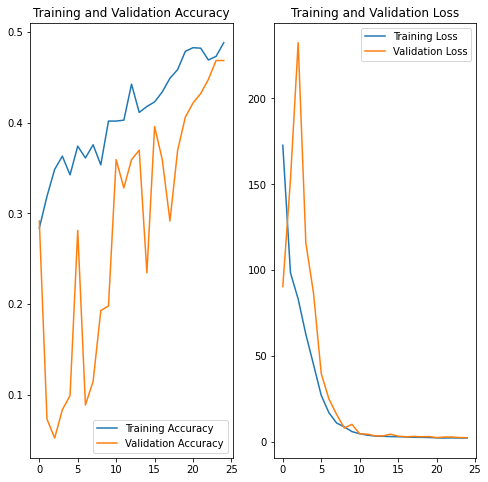

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

{'vascular lesion': 139, 'dermatofibroma': 95, 'squamous cell carcinoma': 181, 'basal cell carcinoma': 376, 'pigmented benign keratosis': 462, 'nevus': 357, 'seborrheic keratosis': 77, 'melanoma': 438, 'actinic keratosis': 114}


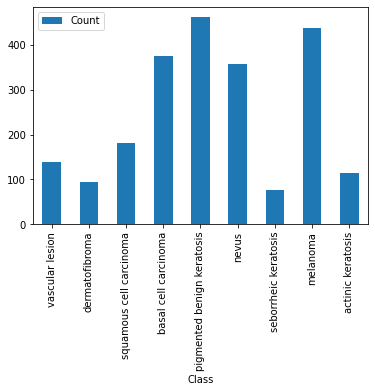

In [ ]:
## Your code goes here.
import os
imb_dict={}
classnames=os.listdir(data_dir_train)
for fldr in os.listdir(data_dir_train):
  img=os.listdir(pathlib.Path(data_dir_train,fldr))
  imb_dict[fldr]=len(img)
print(imb_dict)
import matplotlib.pyplot as plt
names = list(imb_dict.keys())
values = list(imb_dict.values())

#plt.bar(range(len(imb_dict)), values, tick_label=names)
df=pd.DataFrame(imb_dict.items(),columns=['Class','Count'])
df.plot(kind='bar',x='Class',y='Count')
plt.show()

In [ ]:
import glob
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
path_list
lesion_list_new = [os.path.basename(os.path.dirname(y)) for y in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
lesion_list_new
dataframe_dict = dict(zip(path_list, lesion_list_new))
original_df = pd.DataFrame(list(dataframe_dict.items()),columns = ['Path','Label'])
original_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

#### **Todo:** Write your findings here: 
#### - Which class has the least number of samples? 
**Ans. `seborrheic keratosis`**

#### - Which classes dominate the data in terms proportionate number of samples? 
**Ans. `pigmented benign keratosis`**


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [7]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


**Since images are spherical in nature we can do rotations and flips while augmenting**

In [8]:
path_to_training_dataset=data_dir_train
class_names=os.listdir(data_dir_train)
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(pathlib.Path(path_to_training_dataset , i))
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.flip_random(probability=0.5)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/drive/My Drive/Deep Learning Google colab upgrad/Melanoma Detection/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1A6A773310>: 100%|██████████| 500/500 [00:21<00:00, 22.99 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/drive/My Drive/Deep Learning Google colab upgrad/Melanoma Detection/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F1A64503ED0>: 100%|██████████| 500/500 [01:33<00:00,  5.35 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/drive/My Drive/Deep Learning Google colab upgrad/Melanoma Detection/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1A645D32D0>: 100%|██████████| 500/500 [00:18<00:00, 27.24 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/drive/My Drive/Deep Learning Google colab upgrad/Melanoma Detection/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F1A6A7F28D0>: 100%|██████████| 500/500 [00:41<00:00, 11.94 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/drive/My Drive/Deep Learning Google colab upgrad/Melanoma Detection/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1A645BD650>: 100%|██████████| 500/500 [00:18<00:00, 27.27 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/drive/My Drive/Deep Learning Google colab upgrad/Melanoma Detection/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1A645BD950>: 100%|██████████| 500/500 [00:18<00:00, 27.08 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/drive/My Drive/Deep Learning Google colab upgrad/Melanoma Detection/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1A64540710>: 100%|██████████| 500/500 [00:17<00:00, 27.94 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/drive/My Drive/Deep Learning Google colab upgrad/Melanoma Detection/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F1A644C0D50>: 100%|██████████| 500/500 [00:18<00:00, 27.49 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/drive/My Drive/Deep Learning Google colab upgrad/Melanoma Detection/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=767x576 at 0x7F1B0213B3D0>: 100%|██████████| 500/500 [01:29<00:00,  5.59 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [9]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [10]:
import glob
path_list_new = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]

In [ ]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
#lesion_list_new

In [ ]:
dataframe_dict_new = dict(zip(path_list_new, lesion_list_new))

In [ ]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = original_df.append(df2)

In [ ]:
new_df['Label'].value_counts()

pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [11]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [12]:
data_dir_train='/content/drive/My Drive/Deep Learning Google colab upgrad/Melanoma Detection/Train'
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.1,
  subset ='training' ,## Todo choose the correct parameter value, so that only training data is refered to,,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 6066 files for training.


#### **Todo:** Create a validation dataset

In [13]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [14]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  #validation_split = 0.2,
  #subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.


#### **Todo:** Create your model (make sure to include normalization)

In [15]:
class_names = train_ds.class_names
print(class_names)

AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [16]:
## your code goes here
initializer = tf.keras.initializers.HeNormal()

model = Sequential()
#model.add(Resizing(180,180))
model.add(Rescaling(1./255))
model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=(180,180,3),kernel_initializer=initializer))
#model.add(Activation('LeakyRelu'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3),kernel_initializer=initializer))
#model.add(Activation('LeakyRelu'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding='same',kernel_initializer=initializer))
#model.add(Activation('LeakyRelu'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3),kernel_initializer=initializer))
#model.add(Activation('LeakyRelu'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=l2(0.01),kernel_initializer=initializer))
#model.add(Activation('LeakyRelu'))
model.add(tf.keras.layers.LeakyReLU(alpha=0.2))
model.add(Dropout(0.2))
model.add(Dense(9,kernel_initializer=initializer))
model.add(Activation('softmax'))


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [17]:
## your code goes here
model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),#'categorical_crossentropy',
  metrics=['accuracy'])
from keras.callbacks import ModelCheckpoint
filepath='weights-improvement-{epoch:02d}-{val_accuracy:.2f}.hdfs'
checkpoint=ModelCheckpoint(filepath,monitor='val_accuracy',verbose=1,save_best_only=True,mode='max')
callbacks_list=[checkpoint]

#### **Todo:**  Train your model

In [18]:
epochs = 50
## Your code goes here, use 50 epochs.
history=model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=50,
  callbacks=callbacks_list,verbose=1
)# your model fit code

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


190/190 [==============================] - ETA: 0s - loss: 107.2082 - accuracy: 0.3353
Epoch 1: val_accuracy improved from -inf to 0.19822, saving model to weights-improvement-01-0.20.hdfs
INFO:tensorflow:Assets written to: weights-improvement-01-0.20.hdfs/assets
190/190 [==============================] - 77s 331ms/step - loss: 107.2082 - accuracy: 0.3353 - val_loss: 102.4204 - val_accuracy: 0.1982
Epoch 2/50
190/190 [==============================] - ETA: 0s - loss: 22.3975 - accuracy: 0.4191
Epoch 2: val_accuracy did not improve from 0.19822
190/190 [==============================] - 49s 259ms/step - loss: 22.3975 - accuracy: 0.4191 - val_loss: 16.5670 - val_accuracy: 0.1819
Epoch 3/50
190/190 [==============================] - ETA: 0s - loss: 7.2298 - accuracy: 0.4674
Epoch 3: val_accuracy improved from 0.19822 to 0.56050, saving model to weights-improvement-03-0.56.hdfs
INFO:tensorflow:Assets written to: weights-improvement-03-0.56.hdfs/assets
190/190 [=============================

In [19]:
model.evaluate(test_ds)

4/4 [==============================] - 24s 413ms/step - loss: 6.9257 - accuracy: 0.2797


[6.925719261169434, 0.27966102957725525]

**Since the accuracy is fluctuating i have used weights of the epoch at which we have good accuracy**

In [20]:
model.load_weights('weights-improvement-45-0.81.hdfs')
model.evaluate(test_ds)

4/4 [==============================] - 4s 91ms/step - loss: 4.3782 - accuracy: 0.4153


[4.378168106079102, 0.41525423526763916]

**Even after balancing classes model overfitted, Accuracy on test data is consierably low**

#### **Todo:**  Visualize the model results

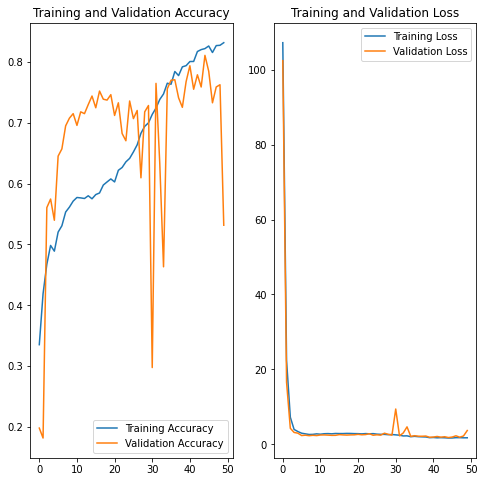

In [21]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



**While training dataset model is fluctuating even afteradding drop out layers, So while testing data i have used belonged to epoch for which there is maximum accuracy by using check points**

**Validation and Train accuracy are close to each other, But when compared with test dataset the difference is more.From this i can say that model is still overfitting**